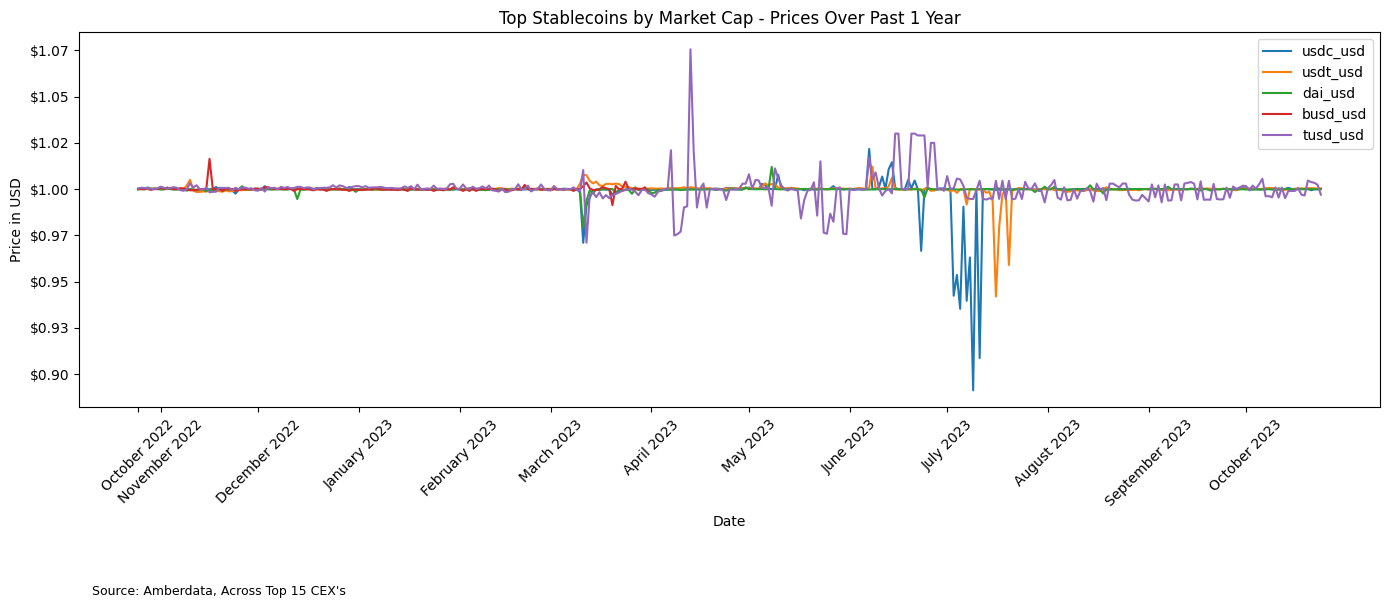

In [1]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.ticker as ticker

# Function to fetch data
def fetch_data(pair, start_date, end_date):
    url = f"https://web3api.io/api/v2/market/spot/prices/pairs/{pair}/historical/?timeInterval=day&startDate={start_date}&endDate={end_date}"
    headers = {
        "accept": "application/json",
        "x-api-key": "API-KEY-HERE"
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()['payload']['data']
        # Extract date and price
        dates = [datetime.utcfromtimestamp(item['timestamp'] / 1000) for item in data if item['price'] is not None]
        prices = [float(item['price']) for item in data if item['price'] is not None]
        return dates, prices
    else:
        print(f"Error fetching data for {pair}")
        return [], []

# Pairs you want to plot
pairs = ["usdc_usd", "usdt_usd", "dai_usd", "busd_usd", "tusd_usd"]

# Calculate the timestamps for the past 3 years
end_date = datetime.utcnow()
start_dates = [end_date - timedelta(days=365 * i) for i in range(1, 2)]
end_dates = [end_date - timedelta(days=365 * (i-1)) for i in range(1, 2)]

# Fetch and plot data
plt.figure(figsize=(14,7))
for pair in pairs:
    all_dates = []
    all_prices = []
    for start, end in zip(start_dates, end_dates):
        dates, prices = fetch_data(pair, int(start.timestamp() * 1000), int(end.timestamp() * 1000))
        all_dates.extend(dates)
        all_prices.extend(prices)
    plt.plot(all_dates, all_prices, label=pair)

unique_months = list({date.strftime('%B %Y'): date for date in all_dates}.values())
display_months = unique_months[::2]
plt.xticks(unique_months, [date.strftime('%B %Y') for date in unique_months], rotation=45)

formatter = ticker.FuncFormatter(lambda x, pos: f"${x:.2f}")
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Top Stablecoins by Market Cap - Prices Over Past 1 Year')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.annotate("Source: Amberdata, Across Top 15 CEX's", (0.01, -0.5), xycoords='axes fraction', fontsize=9)
plt.tight_layout()
plt.show()